In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")
df.head(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


In [10]:
df.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [12]:
df.shape

(5000, 20)

In [22]:
df = df.fillna('No data')

In [24]:
df.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [28]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [30]:
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,No data,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,No data,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,No data,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,No data,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,No data,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [32]:
def statistical_analysis(df):
    """
    function to find statistical data for finding mean,
    median, standard deviation and skewness.
    
    """
    
    statistical_data = df.select_dtypes(include=['number'])
    
    # Perform analysis on numeric columns only
    if statistical_data.empty:
        print("No Statistical data available for analysis.")
        return
    
    
    # Statistics (mean, median, standard deviation)
    stat = statistical_data.describe().T 
    stat['skewness'] = statistical_data.skew()
    stat['kurtosis'] = statistical_data.kurtosis() 
    
    # Display statistical analysis
    print("Statistical Analysis:\n", stat)

    # Provide detailed explanation
    print("\nDetailed Explanation:")
    for column in statistical_data.columns:
        mean = statistical_data[column].mean()
        median = statistical_data[column].median()
        std_dev = statistical_data[column].std()
        skew = statistical_data[column].skew()
        kurt = statistical_data[column].kurtosis()

        print(f"\n{column} Statistics:")
        print(f" - Mean: {mean}")
        print(f" - Median: {median}")
        print(f" - Standard Deviation: {std_dev}")
        print(f" - Skewness: {skew}")
        print(f" - Kurtosis: {kurt}")

statistical_analysis(df)

Statistical Analysis:
                                   count     mean        std   min   25%   50%  \
Age                              5000.0  40.9950  11.296021  22.0  31.0  41.0   
Years_of_Experience              5000.0  17.8102  10.020412   1.0   9.0  18.0   
Hours_Worked_Per_Week            5000.0  39.6146  11.860194  20.0  29.0  40.0   
Number_of_Virtual_Meetings       5000.0   7.5590   4.636121   0.0   4.0   8.0   
Work_Life_Balance_Rating         5000.0   2.9842   1.410513   1.0   2.0   3.0   
Social_Isolation_Rating          5000.0   2.9938   1.394615   1.0   2.0   3.0   
Company_Support_for_Remote_Work  5000.0   3.0078   1.399046   1.0   2.0   3.0   

                                  75%   max  skewness  kurtosis  
Age                              51.0  60.0 -0.020576 -1.203739  
Years_of_Experience              26.0  35.0  0.007749 -1.206419  
Hours_Worked_Per_Week            50.0  60.0  0.032316 -1.204188  
Number_of_Virtual_Meetings       12.0  15.0 -0.015123 -1.203163 

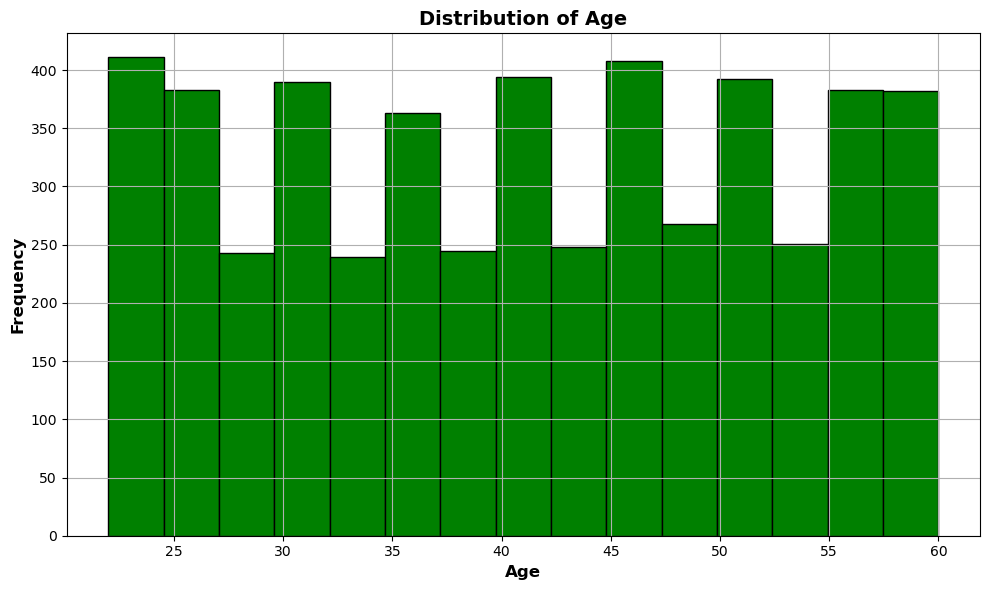

In [42]:
def age_distribution(df):
    """
    Function to plot the distribution of Age using a histogram.
    
    """
    # Histogram of Age
    plt.figure(figsize=(10, 6))
    plt.hist(df['Age'], bins=15, color='Green', edgecolor='black')
    plt.title('Distribution of Age', fontsize=14, fontweight='bold')
    plt.xlabel('Age', fontsize=12, fontweight='bold')
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage: 
# Assuming 'df' is your DataFrame containing the data
age_distribution(df)


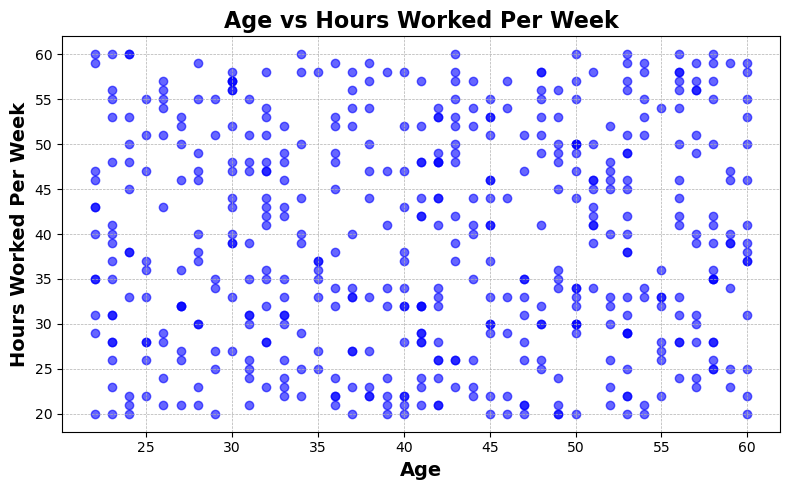

In [36]:
def plot_scatter_age_vs_hours(df):
    """
    Function to plot a scatter plot showing the relationship between 'Age' and 'Hours_Worked_Per_Week'.
    
    """
    # Plotting the scatter plot for the first 100 rows (optional)
    df_subset = df.head(500)  # Selects the first 100 rows
    
    # Plotting the scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(df_subset['Age'], df_subset['Hours_Worked_Per_Week'], color='blue', alpha=0.6)
    
    # Adding title and labels
    plt.title('Age vs Hours Worked Per Week', fontsize=16, fontweight='bold')
    plt.xlabel('Age', fontsize=14, fontweight='bold')
    plt.ylabel('Hours Worked Per Week', fontsize=14, fontweight='bold')
    
    # Adding grid for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Adjusting the layout and displaying the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_scatter_age_vs_hours(df)





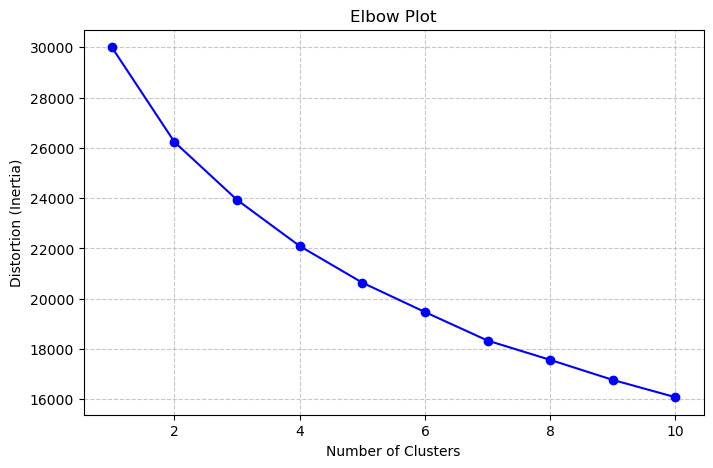

In [40]:
def plot_elbow(data, max_clusters=10):
    """
    Plots the elbow method for determining the optimal number of clusters for K-Means clustering.
    """
    # Select only the relevant numerical columns for clustering
    columns_with_numbers= [
        "Years_of_Experience","Hours_Worked_Per_Week",
        "Number_of_Virtual_Meetings","Work_Life_Balance_Rating","Social_Isolation_Rating",
        "Company_Support_for_Remote_Work"
    ]
    
    # Filter the DataFrame to include only the numerical columns
    data_cleaned = data[columns_with_numbers]

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_cleaned)

    distortions = []
    K = range(1, max_clusters + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, marker='o', color='blue')
    plt.title("Elbow Plot")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion (Inertia)")
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

plot_elbow(df)

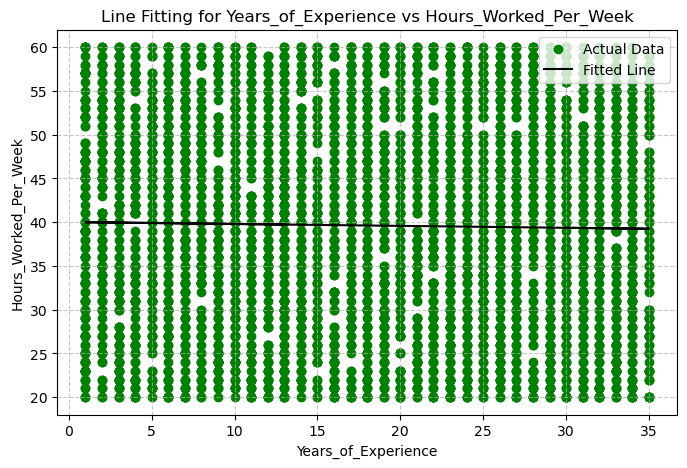

In [49]:
# Function to perform line fitting
def perform_line_fitting():
    x_column = 'Years_of_Experience'
    y_column = 'Hours_Worked_Per_Week'
    x = df[[x_column]].values
    y = df[y_column].values
    model = LinearRegression()
    model.fit(x, y)
    predictions = model.predict(x)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='green', label="Actual Data")
    plt.plot(x, predictions, color='black', label="Fitted Line")
    plt.title(f"Line Fitting for {x_column} vs {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()
    return
perform_line_fitting()